<ipython-input-4-c077f8191b8b>:27: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Date': pd.date_range(start='2024-01-01', periods=n_orders, freq='H').to_numpy(),


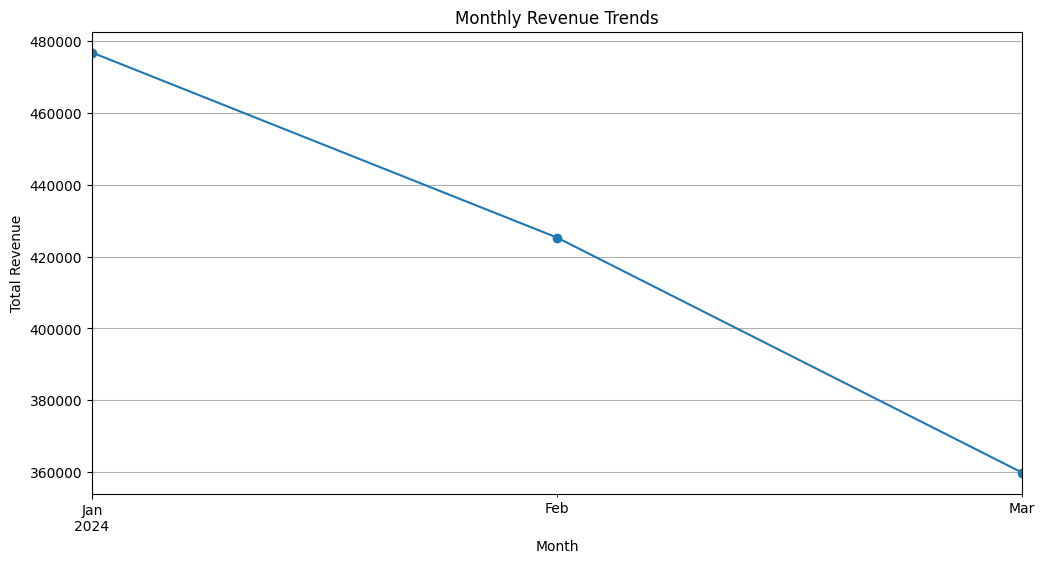

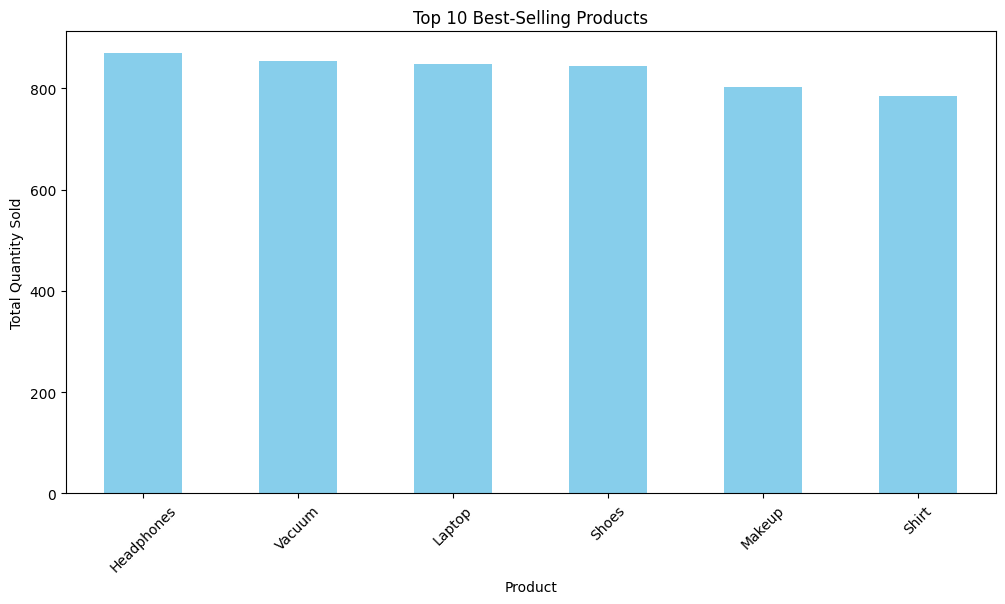

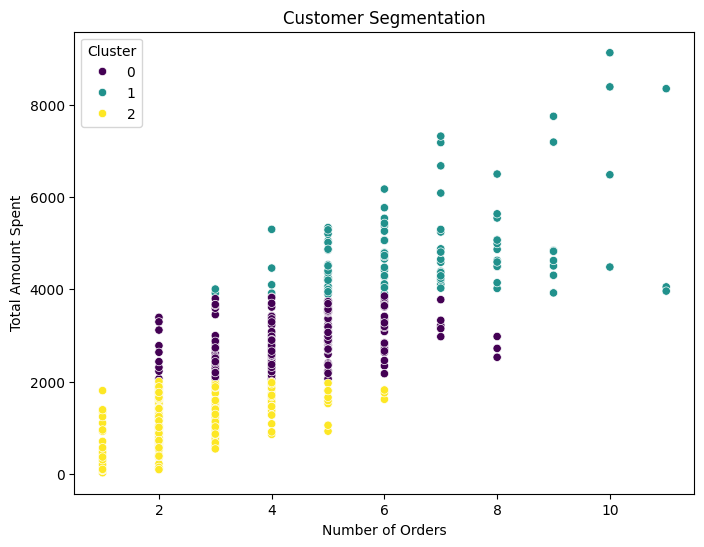

Analysis complete. Processed data saved.


In [4]:
# E-commerce Sales Data Analysis

#install libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#this generates random dataset
np.random.seed(42)
n_customers = 500
n_orders = 2000

#this generates customers
df_customers = pd.DataFrame({
    'CustomerID': np.arange(1, n_customers + 1),
    'CustomerType': np.random.choice(['New', 'Returning', 'VIP'], size=n_customers, p=[0.5, 0.4, 0.1])
})

#generating orders
df_orders = pd.DataFrame({
    'OrderID': np.arange(1, n_orders + 1),
    'Date': pd.date_range(start='2024-01-01', periods=n_orders, freq='H').to_numpy(),
    'CustomerID': np.random.choice(df_customers['CustomerID'], size=n_orders),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home & Kitchen', 'Beauty'], size=n_orders),
    'Product': np.random.choice(['Laptop', 'Shirt', 'Vacuum', 'Makeup', 'Headphones', 'Shoes'], size=n_orders),
    'Quantity': np.random.randint(1, 5, size=n_orders),
    'Price': np.random.uniform(10, 500, size=n_orders)
})

#calc revenue
df_orders['Revenue'] = df_orders['Quantity'] * df_orders['Price']

#data Cleaning + check for missing val
df_orders.dropna(inplace=True)
df_orders['Date'] = pd.to_datetime(df_orders['Date'])

#Part 2 Exploratory Data Analysis
#monthly revenue trends
plt.figure(figsize=(12, 6))
df_orders.groupby(df_orders['Date'].dt.to_period('M'))['Revenue'].sum().plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trends')
plt.grid()
plt.show()

#top 10 best-selling products
plt.figure(figsize=(12, 6))
df_orders.groupby('Product')['Quantity'].sum().nlargest(10).plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=45)
plt.show()

#custoer segmentation using K-Means
customer_data = df_orders.groupby('CustomerID').agg({'Revenue': 'sum', 'OrderID': 'count'})
customer_data.columns = ['TotalSpent', 'TotalOrders']

#using K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data)

#visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_data, x='TotalOrders', y='TotalSpent', hue='Cluster', palette='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Total Amount Spent')
plt.title('Customer Segmentation')
plt.show()

#saving processed data
df_orders.to_csv('synthetic_ecommerce_data.csv', index=False)
customer_data.to_csv('customer_segmentation.csv', index=False)

print("Analysis complete. Processed data saved.")
